In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv ('AAPL.csv')

In [48]:
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [49]:
df1 = df.reset_index()['close']

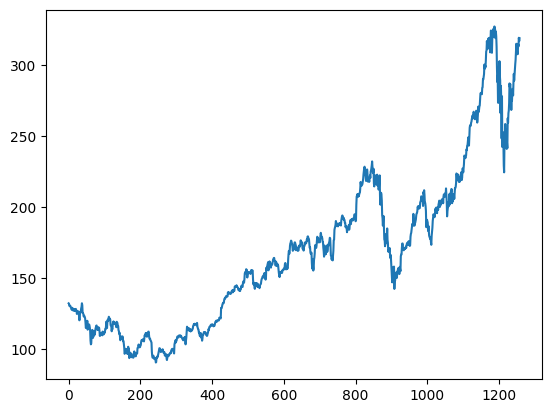

In [50]:
plt.plot(df1)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [52]:
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

# Splitting Data

In [53]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size

In [54]:
training_size

817

In [55]:
print(test_size)

441


In [56]:
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

# Dataset Matrix

In [57]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [58]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [59]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [60]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [61]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create LSTM Model

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [63]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 54s 1s/step - loss: 0.0179 - val_loss: 0.0601
Epoch 2/100
12/12 [==============================] - 7s 613ms/step - loss: 0.0037 - val_loss: 0.0041
Epoch 3/100
12/12 [==============================] - 6s 532ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 4/100
12/12 [==============================] - 7s 617ms/step - loss: 9.7899e-04 - val_loss: 0.0040
Epoch 5/100
12/12 [==============================] - 7s 565ms/step - loss: 6.6024e-04 - val_loss: 0.0054
Epoch 6/100
12/12 [==============================] - 7s 575ms/step - loss: 5.9363e-04 - val_loss: 0.0039
Epoch 7/100
12/12 [==============================] - 7s 595ms/step - loss: 5.8756e-04 - val_loss: 0.0036
Epoch 8/100
12/12 [==============================] - 6s 545ms/step - loss: 5.7763e-04 - val_loss: 0.0044
Epoch 9/100
12/12 [==============================] - 7s 608ms/step - loss: 5.8608e-04 - val_loss: 0.0049
Epoch 10/100
12/12 [==============================] - 6s 521ms/step -

12/12 [==============================] - 7s 597ms/step - loss: 1.6891e-04 - val_loss: 9.2182e-04
Epoch 79/100
12/12 [==============================] - 6s 523ms/step - loss: 1.6611e-04 - val_loss: 0.0010
Epoch 80/100
12/12 [==============================] - 7s 624ms/step - loss: 1.6704e-04 - val_loss: 8.6143e-04
Epoch 81/100
12/12 [==============================] - 6s 520ms/step - loss: 1.5020e-04 - val_loss: 8.4154e-04
Epoch 82/100
12/12 [==============================] - 7s 584ms/step - loss: 1.7033e-04 - val_loss: 0.0011
Epoch 83/100
12/12 [==============================] - 7s 567ms/step - loss: 1.7974e-04 - val_loss: 8.4736e-04
Epoch 84/100
12/12 [==============================] - 6s 544ms/step - loss: 2.0535e-04 - val_loss: 9.0794e-04
Epoch 85/100
12/12 [==============================] - 7s 609ms/step - loss: 1.7908e-04 - val_loss: 0.0013
Epoch 86/100
12/12 [==============================] - 6s 520ms/step - loss: 1.5446e-04 - val_loss: 8.3922e-04
Epoch 87/100
12/12 [===============

In [65]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Prediction Performance Metrix

In [72]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 2s 139ms/step


In [67]:
test_predict.shape

(340, 1)

# Transformback to Original Form

In [73]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)                  

In [74]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.78011500946636

In [75]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

238.85769652066094

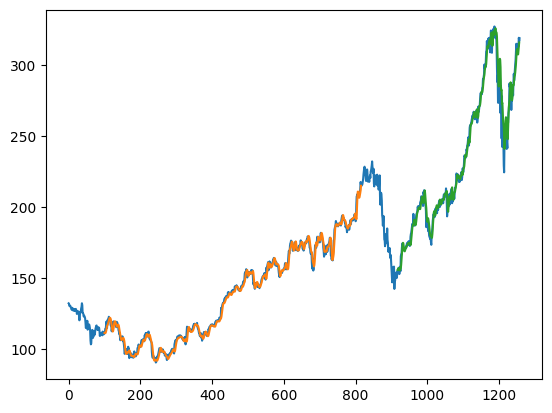

In [76]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [77]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [78]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [79]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.96081877]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

8 day output [[0.9665907]]
9 day input [0.93869797 0.93304061 0.94950604 0.96424048 0.95512117 0.95989192
 0.96635143 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106
 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9

16 day output [[0.9844159]]
17 day input [0.92295027 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591
 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575
 1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.96081877
 0.96072185 0.9600450

24 day output [[1.0062611]]
25 day input [0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.96081877 0.96072185 0.96004504
 0.95985079 0.9603377  0.96139777 0.96287596 0.96464086 0.9665907
 0.96865028 0.97077185 0.9

In [80]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

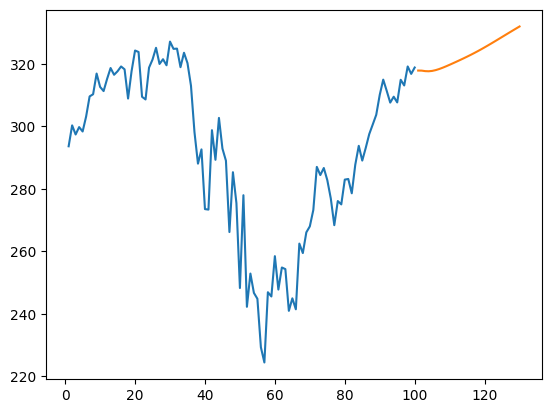

In [81]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

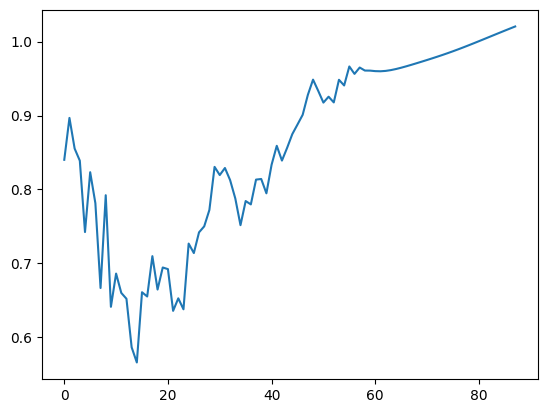

In [82]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [83]:
df3=scaler.inverse_transform(df3).tolist()

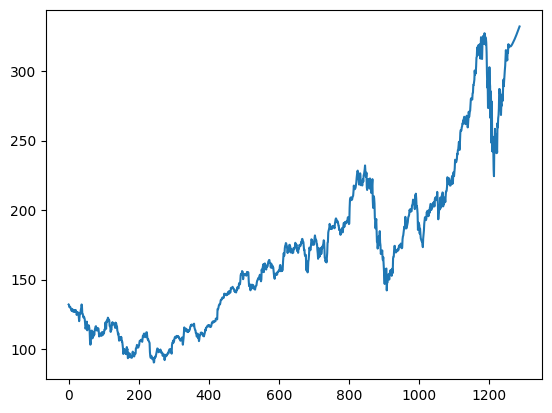

In [84]:
plt.plot(df3)